In [1]:
# import

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dfUmbrella = pd.read_excel("D:/BDS2/block 3/Predication & Forecasting/Assignment 1/Umbrella.xlsx")

In [4]:
###########################################################
### fPlot84() page 84
from matplotlib.ticker import MultipleLocator
def fPlot84(dfUmbrella):
    x_values = np.arange(1, 6, 0.25)
    plt.figure(dpi=300)
    plt.plot(x_values, dfUmbrella["Umbrella Sales"], color='green', marker='o', linestyle='-')

    plt.minorticks_on()

    major_locator = MultipleLocator(1)
    minor_locator = MultipleLocator(0.25)

    plt.gca().xaxis.set_major_locator(major_locator)
    plt.gca().xaxis.set_minor_locator(minor_locator)

    # Set the vertical scale from 0 to 180
    plt.yticks(np.arange(0, 181, 20))
    # Set non-primary scale labels to empty strings
    plt.yticks(np.arange(0, 181, 5), labels=["" if i % 20 != 0 else str(i) for i in range(0, 181, 5)], minor=True)

    plt.show()

    return

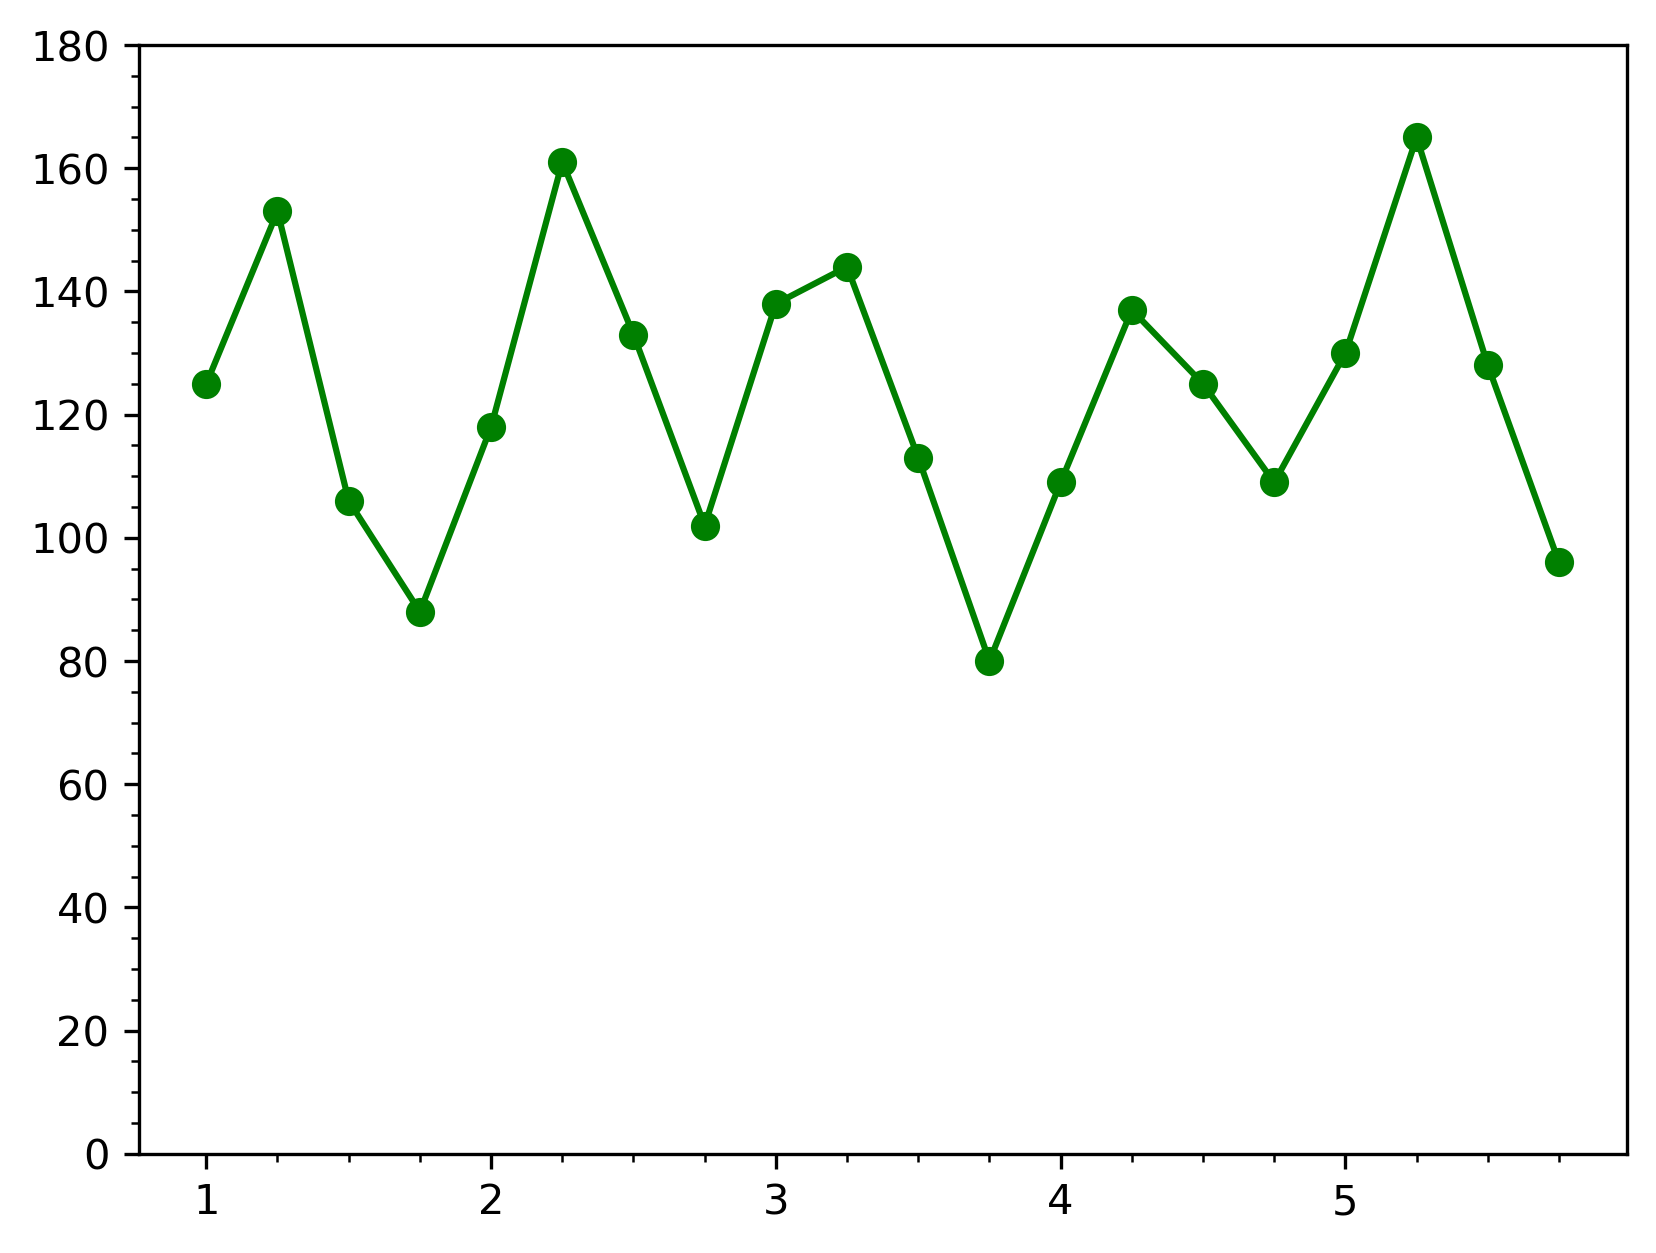

In [5]:
fPlot84(dfUmbrella)

In [6]:
def fSeasonal_HW_Multi(vYt, sSeason, dAlpha, dBeta, dGamma):
    
    iN = len(vYt)
    if sSeason == 'seasonal':
        iS = 4
    elif sSeason == 'monthly':
        iS = 12
    vYt_hat = np.zeros(iN - iS - 1)
    dLt = np.mean(vYt[: iS])
    dGt = (np.mean(vYt[iS: 2 * iS]) - dLt) / iS
    vHt = np.zeros(iN)
    vHt[: iS] = vYt[: iS] / dLt
    
    for i in range(len(vYt_hat)):
        dLt_new = dAlpha * (vYt[i + iS] / vHt[i]) + (1 - dAlpha) * (dLt + dGt)
        dGt = dBeta * (dLt_new - dLt) + (1 - dBeta) * dGt
        vHt[iS + i] = dGamma * vYt[i + iS] / dLt_new + (1 - dGamma) * vHt[i]
        vYt_hat[i] = vHt[i + 1] * (dLt_new + dGt)
        dLt = dLt_new
    vYt_hat = np.round(vYt_hat, 2)
        
    return vYt_hat

In [17]:
def fSeasonal_HW_Add(vYt, sSeason, dAlpha, dBeta, dGamma):
    iN = len(vYt)
    if sSeason == 'seasonal':
        iS = 4
    elif sSeason == 'monthly':
        iS = 12
    vYt_hat = np.zeros(iN - iS - 1)
    dLt = np.mean(vYt[: iS])
    dGt = (np.mean(vYt[iS: 2 * iS]) - dLt) / iS
    vHt = np.zeros(iN)
    vHt[: iS] = vYt[: iS] - dLt


    for i in range(len(vYt_hat)):
        dLt_new = dAlpha * (vYt[i + iS] / vHt[i]) + (1 - dAlpha) * (dLt + dGt)
        dGt = dBeta * (dLt_new - dLt) + (1 - dBeta) * dGt
        vHt[iS + i] = dGamma * vYt[i + iS] / dLt_new + (1 - dGamma) * vHt[i]
        vYt_hat[i] = vHt[i + 1] + dLt_new + dGt
        dLt = dLt_new
        
    vYt_hat = np.round(vYt_hat, 2)
        
    return vYt_hat

In [8]:
def fEvaluation(vYt, vYt_hat):
    
    min_len = min(len(vYt), len(vYt_hat))
    vUt = vYt[1:min_len+1] - vYt_hat[:min_len]
    dME = round(np.mean(vUt), 2)
    dMAE = round(np.mean(np.abs(vUt)), 2)
    dMAPE = round(100 * np.mean(np.divide(np.abs(vUt), np.abs(vYt[1:min_len+1]))), 2)
    dMSE = round(np.mean(vUt ** 2), 2)

    return dME, dMAE, dMAPE, dMSE

In [15]:
def fTunning_Para(vYt, sSeason, bMethod, bEva, iCheck):
    
    vAlpha = np.linspace(0.1, 1, 10)
    vBeta = np.linspace(0.1, 1, 10)
    vGamma = np.linspace(0.1, 1, 10)
    mEva = np.zeros(((len(vAlpha), len(vBeta), len(vGamma))))
    for i in range(len(vAlpha)):
        for j in range(len(vBeta)):
            for k in range(len(vGamma)):
                if bMethod == 'Seasonal_HW_Multi':
                    vSHW = fSeasonal_HW_Multi(vYt, sSeason, vAlpha[i], vBeta[j], vGamma[k])
                    if bEva == 'ME':
                        mEva[i, j, k] = fEvaluation(vYt[-iCheck-1: ], vSHW[-iCheck: ])[0]
                    elif bEva == 'MAE':
                        mEva[i, j, k] = fEvaluation(vYt[-iCheck-1: ], vSHW[-iCheck: ])[1]
                    elif bEva == 'MAPE':
                        mEva[i, j, k] = fEvaluation(vYt[-iCheck-1: ], vSHW[-iCheck: ])[2]
                    elif bEva == 'MSE':
                        mEva[i, j, k] = fEvaluation(vYt[-iCheck-1: ], vSHW[-iCheck: ])[3]
                if bMethod == 'Seasonal_HW_Add':
                    vSHW = fSeasonal_HW_Add(vYt, sSeason, vAlpha[i], vBeta[j], vGamma[k])
                    if bEva == 'ME':
                        mEva[i, j, k] = fEvaluation(vYt[-iCheck-1: ], vSHW[-iCheck: ])[0]
                    elif bEva == 'MAE':
                        mEva[i, j, k] = fEvaluation(vYt[-iCheck-1: ], vSHW[-iCheck: ])[1]
                    elif bEva == 'MAPE':
                        mEva[i, j, k] = fEvaluation(vYt[-iCheck-1: ], vSHW[-iCheck: ])[2]
                    elif bEva == 'MSE':
                        mEva[i, j, k] = fEvaluation(vYt[-iCheck-1: ], vSHW[-iCheck: ])[3]
    iIndex = np.argmin(mEva)
    dAlpha_HW = vAlpha[iIndex // 100]
    dBeta_HW = vBeta[iIndex // 10 % 10]
    dGamma_HW = vGamma[iIndex % 10]
    if bMethod == 'Seasonal_HW_Multi':
        vYt_hat = fSeasonal_HW_Multi(vYt, sSeason, dAlpha_HW, dBeta_HW, dGamma_HW)
    elif bMethod == 'Seasonal_HW_Add':
        vYt_hat = fSeasonal_HW_Add(vYt, sSeason, dAlpha_HW, dBeta_HW, dGamma_HW)
    
    return vYt_hat, dAlpha_HW, dBeta_HW, dGamma_HW

In [18]:
vYt_hat_Umbrella, dAlpha_Umbrella, dBeta_Umbrella, dGamma_Umbrella = fTunning_Para(dfUmbrella["Umbrella Sales"].values, 'seasonal', 'Seasonal_HW_Add', 'MSE', 20)

In [19]:
print("vYt_hat_Umbrella:", vYt_hat_Umbrella)
print("dAlpha_Umbrella:", dAlpha_Umbrella)
print("dBeta_Umbrella:", dBeta_Umbrella)
print("dGamma_Umbrella:", dGamma_Umbrella)

vYt_hat_Umbrella: (array([146.84,  89.63,  59.74,  80.55,  82.72,  71.07, 158.92, 146.45,
       142.31, 135.45, 143.47, 168.18, 171.21, 172.76, 174.41]),)
dAlpha_Umbrella: 0.1
dBeta_Umbrella: 0.1
dGamma_Umbrella: 0.9


In [167]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(dfUmbrella["Umbrella Sales"], trend='add', seasonal='add', seasonal_periods=4, use_boxcox=False)

hw_model = model.fit(optimized=True, remove_bias=False)
forecast = hw_model.forecast(steps=8)
print(forecast)


20    125.885697
21    153.885705
22    122.885708
23     96.885704
24    126.095126
25    154.095134
26    123.095138
27     97.095133
dtype: float64


In [175]:
from matplotlib.ticker import MultipleLocator

def fPlot86(dfUmbrella, forecast_values):
    x_known = np.arange(1, 6, 0.25)
    x_forecast = np.arange(6, 8, 0.25)

    plt.figure(dpi=300)

    plt.plot(x_known, dfUmbrella["Umbrella Sales"], color='green', marker='o', linestyle='-')

    plt.plot(x_forecast, forecast_values, color='blue', marker='o', linestyle='-')

   
    plt.axvline(x=6, color='black', linestyle='--')

    plt.minorticks_on()

    major_locator = MultipleLocator(1)
    minor_locator = MultipleLocator(0.25)

    plt.gca().xaxis.set_major_locator(major_locator)
    plt.gca().xaxis.set_minor_locator(minor_locator)

    
    plt.yticks(np.arange(0, 181, 20))
    
    plt.yticks(np.arange(0, 181, 5), labels=["" if i % 20 != 0 else str(i) for i in range(0, 181, 5)], minor=True)

    plt.show()

   
    return 


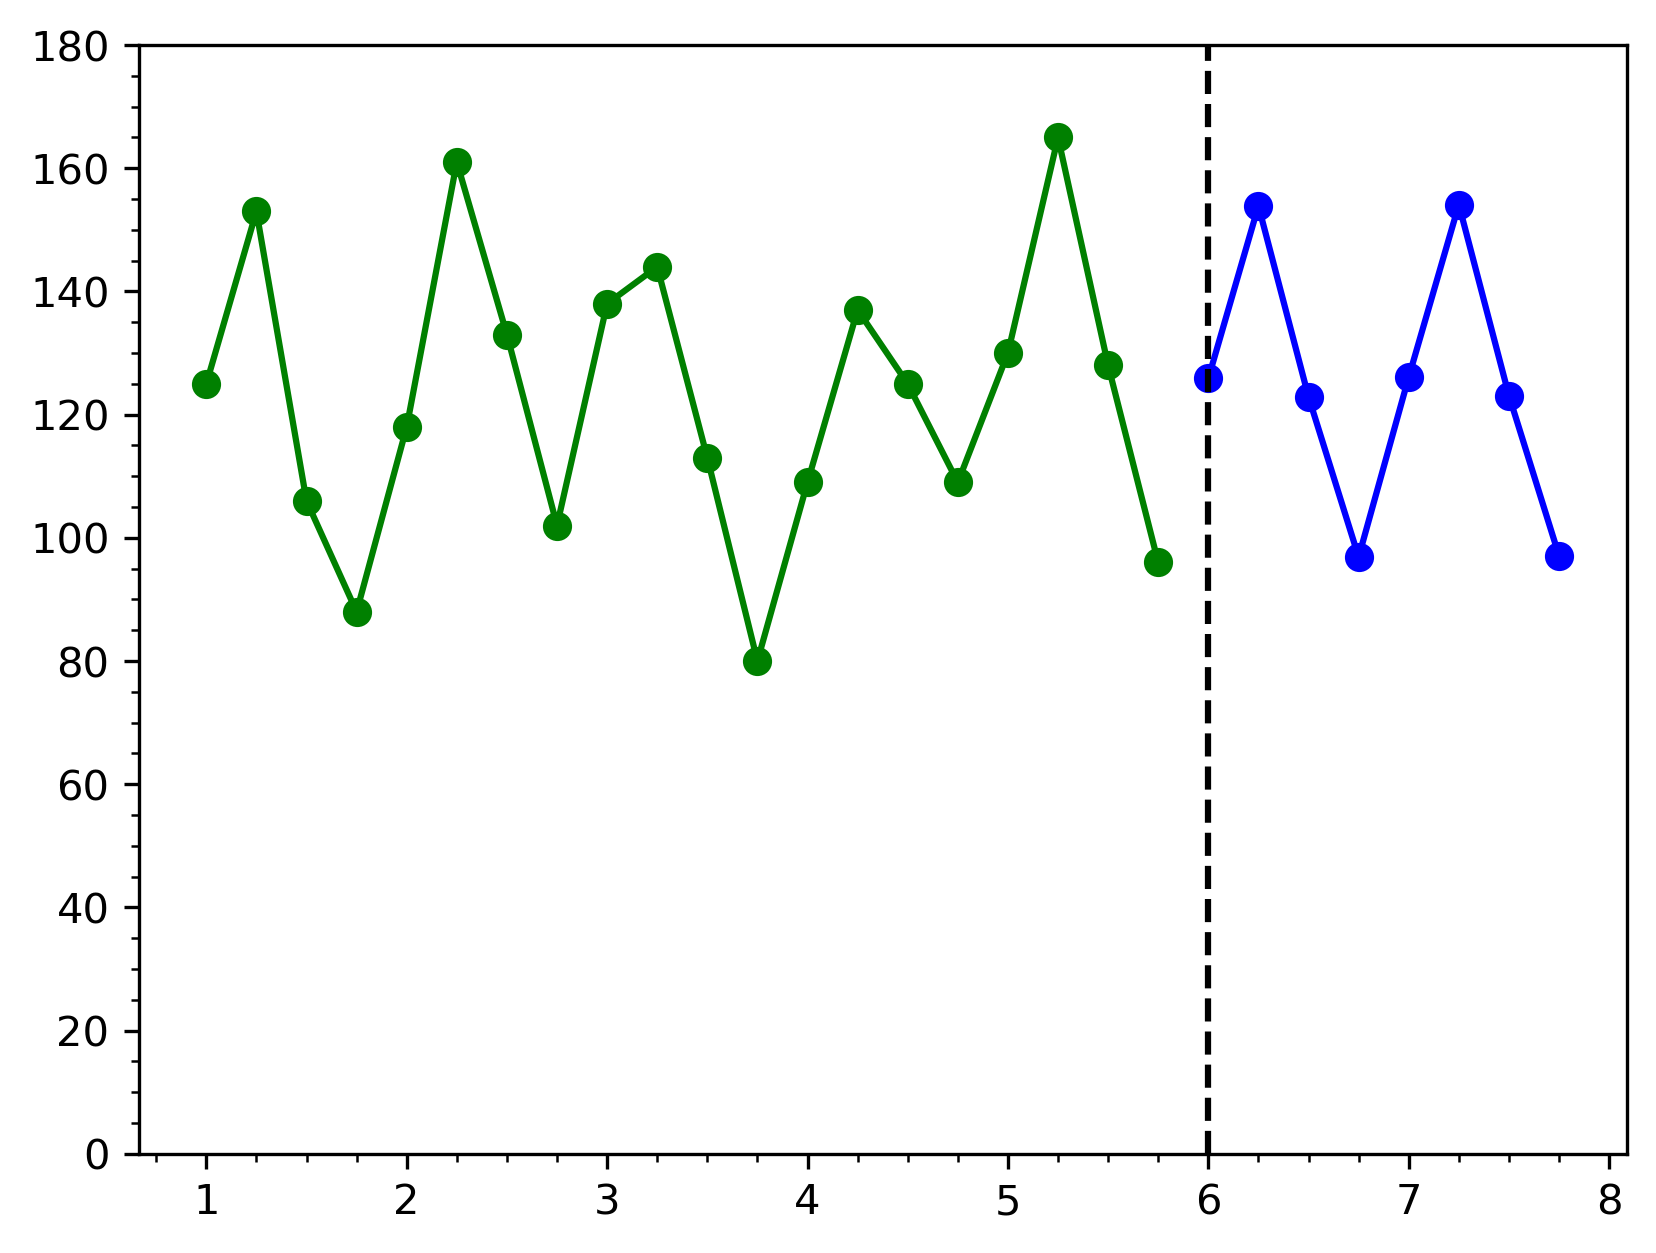

In [176]:
forecast_values = forecast
fPlot86(dfUmbrella, forecast_values)

In [372]:
import statsmodels.api as sm

result = sm.tsa.seasonal_decompose(dfUmbrella["Umbrella Sales"].values, model='additive', period=4)
dLt = pd.Series(result.trend).dropna()
dHt = result.seasonal
print(dLt)
print(dHt)

2     117.125
3     117.250
4     121.625
5     126.750
6     131.000
7     131.375
8     126.750
9     121.500
10    115.125
11    110.625
12    111.250
13    116.375
14    122.625
15    128.750
16    132.625
17    131.375
dtype: float64
[  0.9453125  28.0078125  -1.9609375 -26.9921875   0.9453125  28.0078125
  -1.9609375 -26.9921875   0.9453125  28.0078125  -1.9609375 -26.9921875
   0.9453125  28.0078125  -1.9609375 -26.9921875   0.9453125  28.0078125
  -1.9609375 -26.9921875]


In [373]:
from matplotlib.ticker import MultipleLocator

def fPlot85(dfUmbrella):

    dfUmbrella_trimmed = dfUmbrella.iloc[2:-2]

    x_values = np.arange(1.5, 5.5, 0.25)
    plt.figure(dpi=300)

    plt.plot(x_values, dfUmbrella_trimmed["Umbrella Sales"], color='green', marker='o', linestyle='-')

    plt.plot(x_values, dLt, color='red', linestyle='-', linewidth=2)

    plt.minorticks_on()

    major_locator = MultipleLocator(1)
    minor_locator = MultipleLocator(0.25)

    plt.gca().xaxis.set_major_locator(major_locator)
    plt.gca().xaxis.set_minor_locator(minor_locator)

    plt.yticks(np.arange(0, 181, 20))
    
    plt.yticks(np.arange(0, 181, 5), labels=["" if i % 20 != 0 else str(i) for i in range(0, 181, 5)], minor=True)

    plt.show()
    return



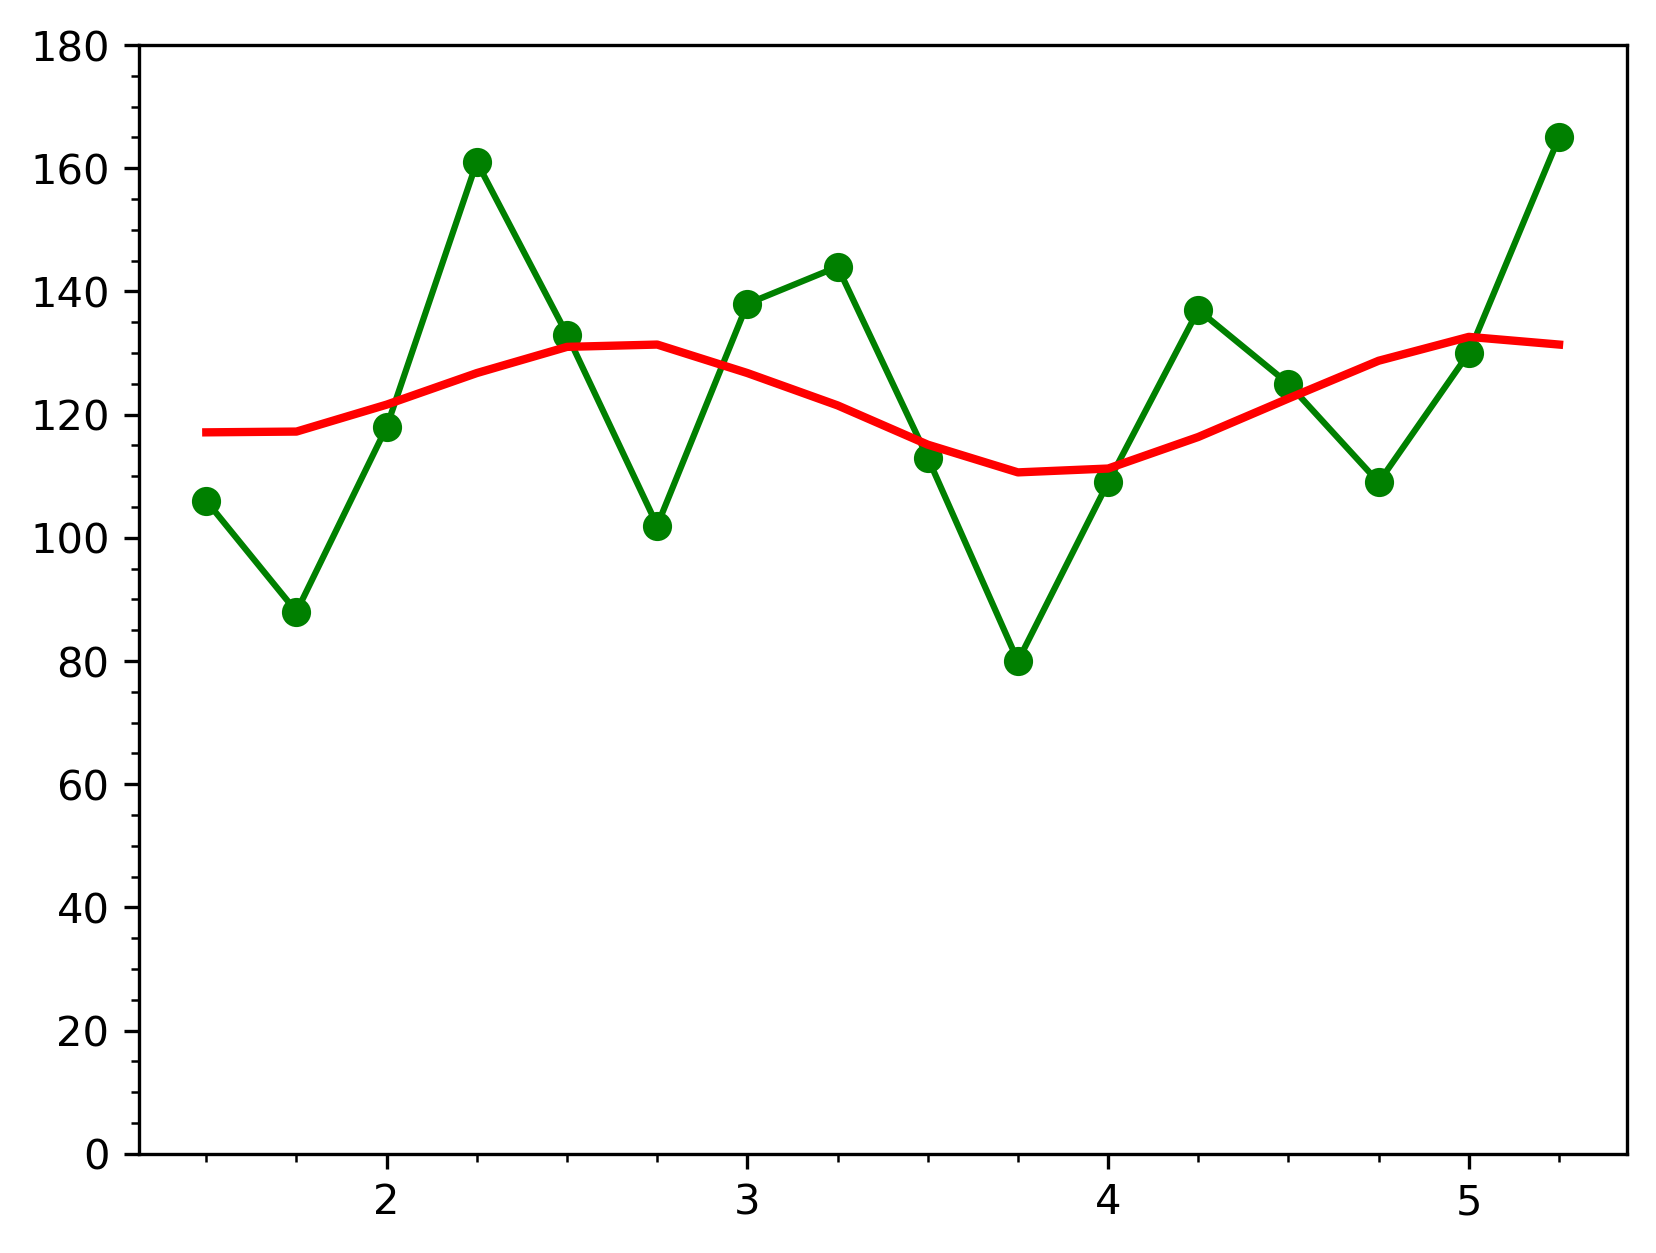

In [374]:
fPlot85(dfUmbrella)

In [375]:
def fPlot85_G2(dfUmbrella):
    x_values = np.arange(1, 6, 0.25)
    plt.figure(dpi=300)


    plt.plot(x_values, dHt, color='blue', linestyle='-', marker='o')

    plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

    plt.minorticks_on()

    major_locator = MultipleLocator(1)
    minor_locator = MultipleLocator(0.25)

    plt.gca().xaxis.set_major_locator(major_locator)
    plt.gca().xaxis.set_minor_locator(minor_locator)

    plt.yticks([-25,0,25])

    plt.show()
    return

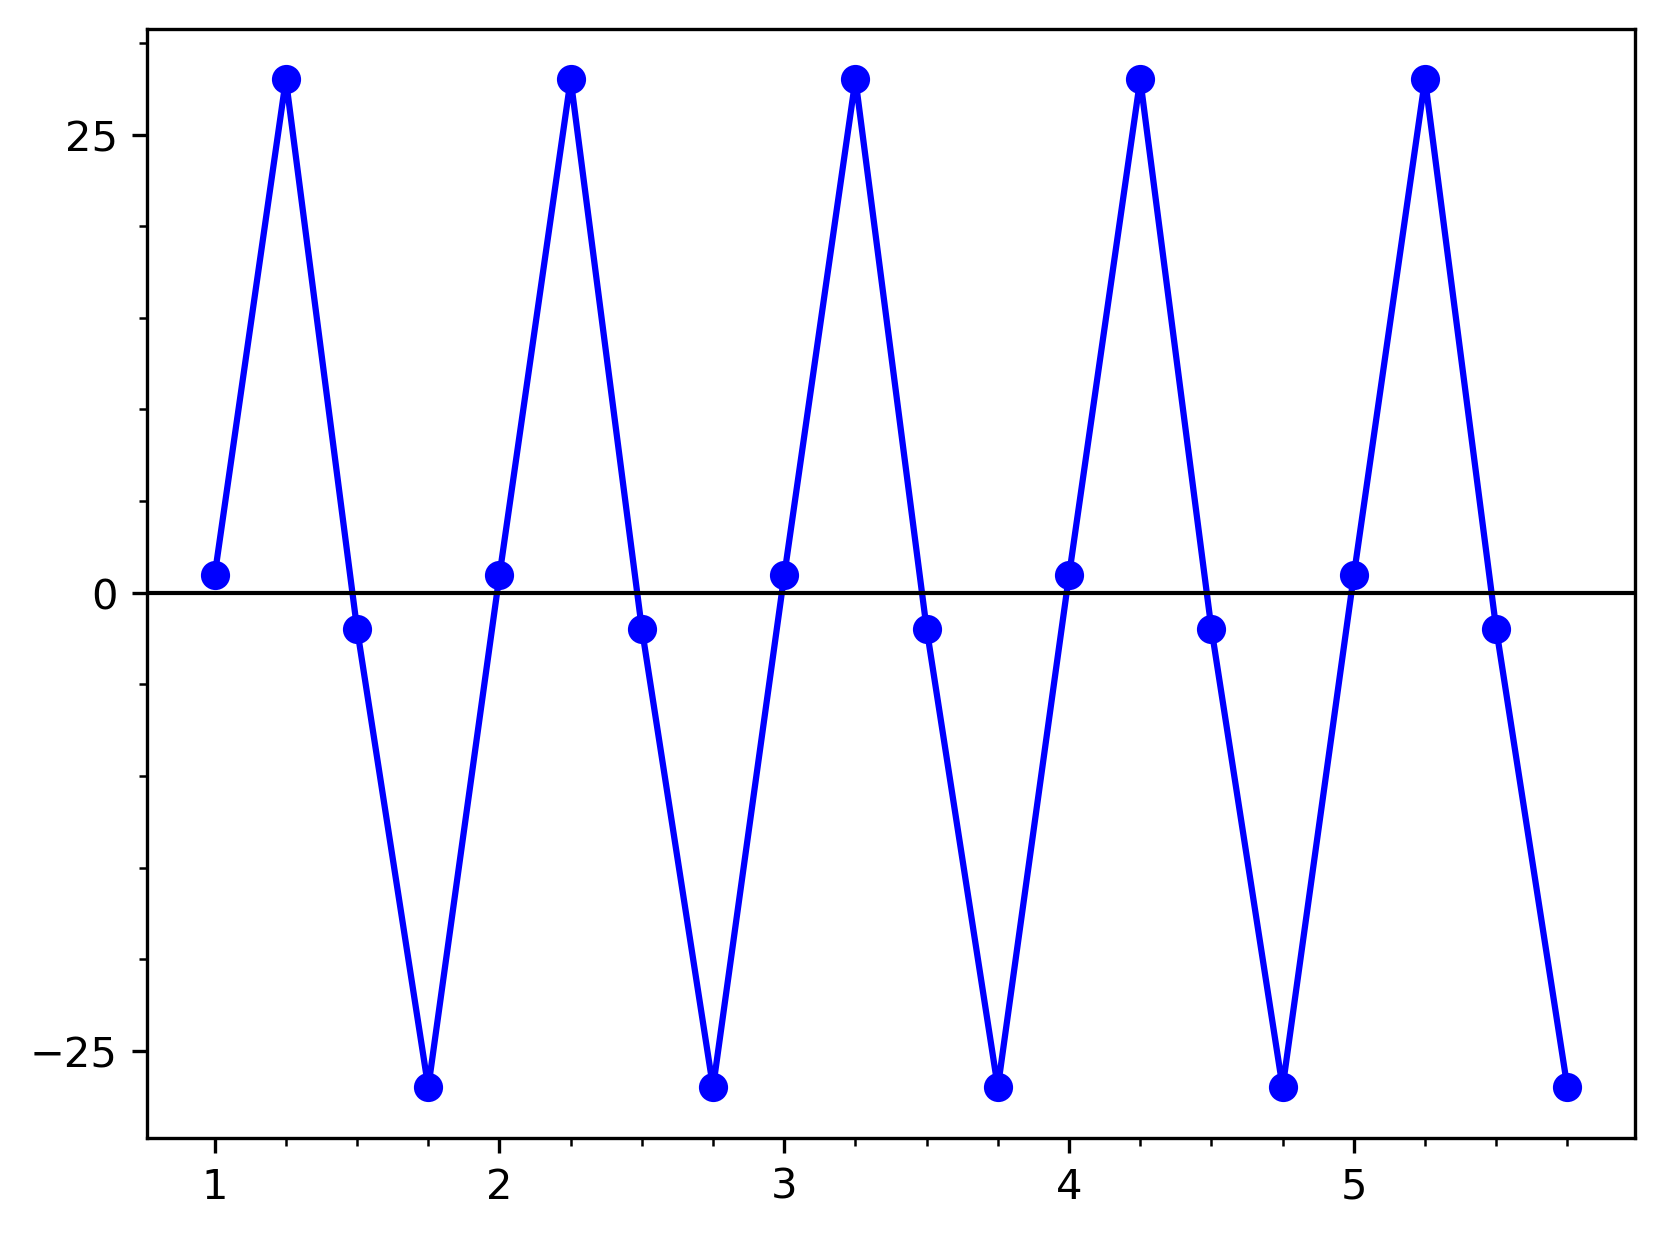

In [376]:
fPlot85_G2(dfUmbrella)

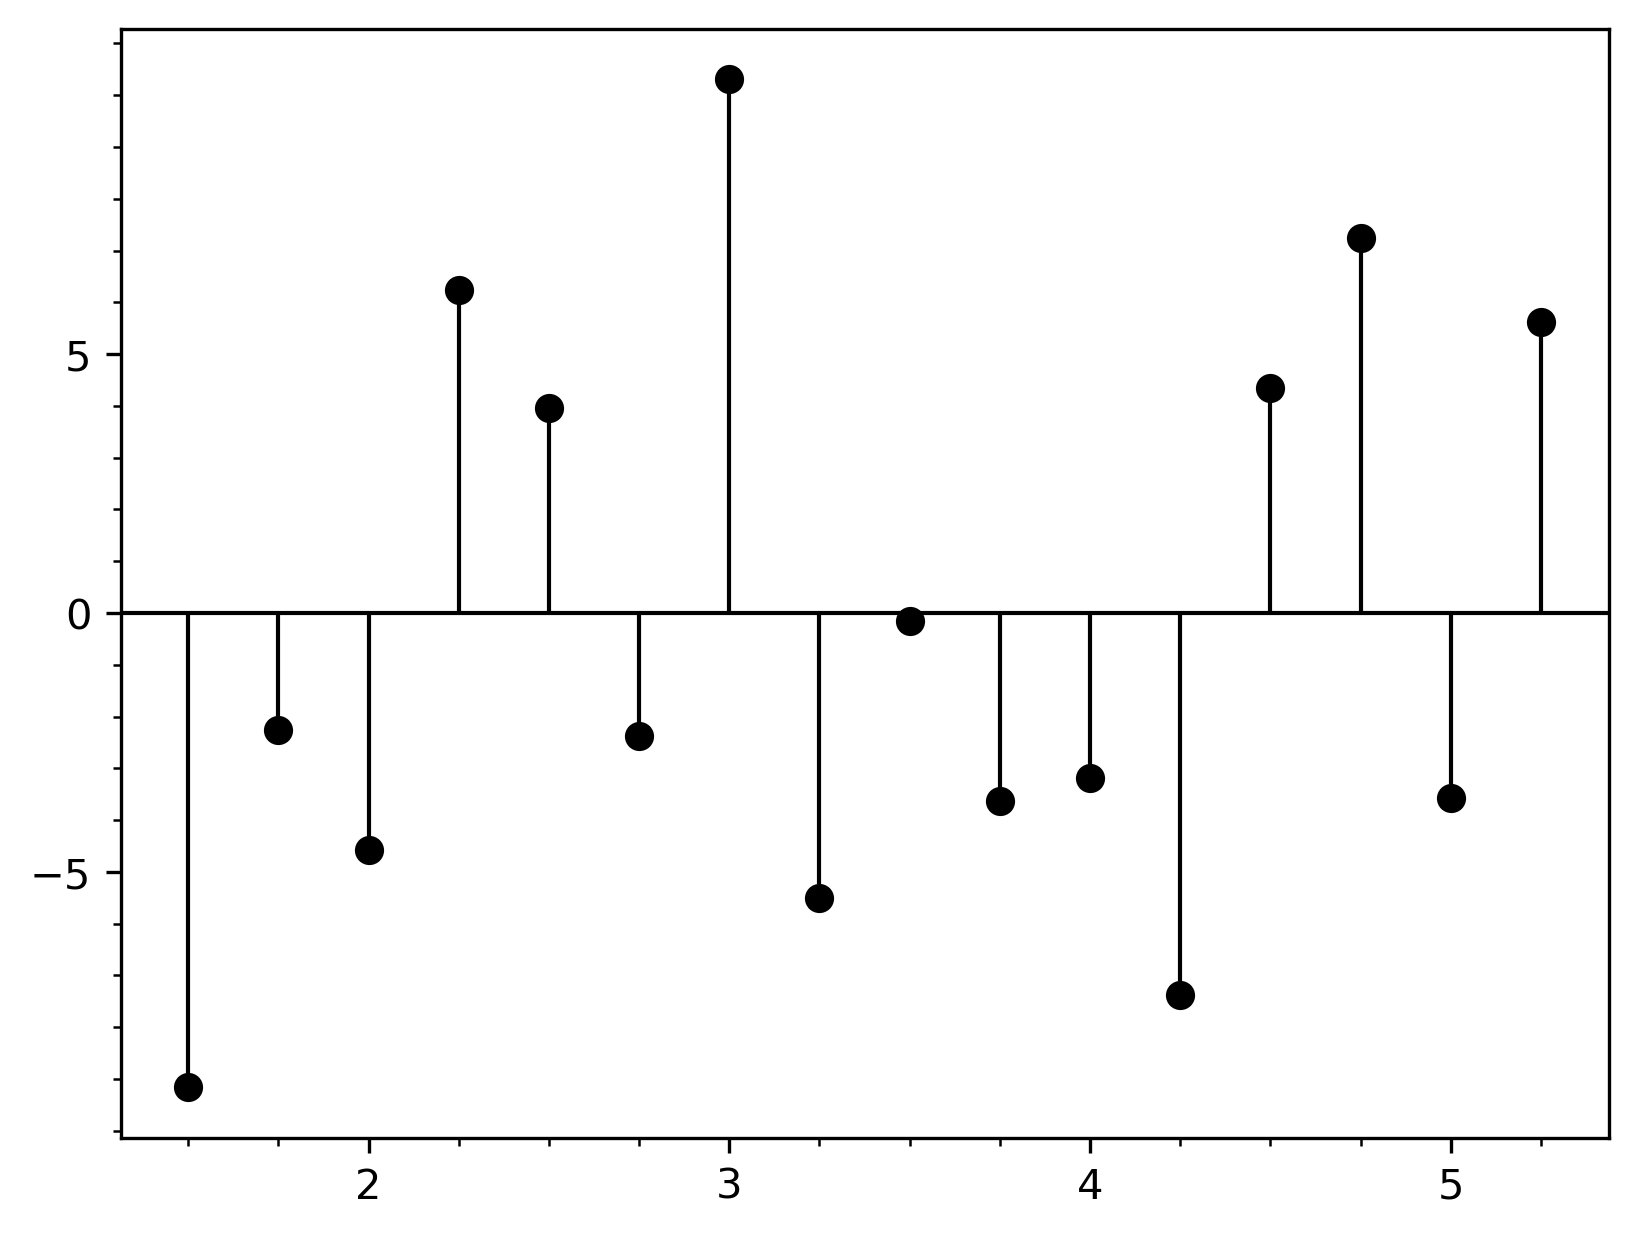

In [380]:
def fPlot85_G3(dfUmbrella):

    dfUmbrella_trimmed = dfUmbrella.iloc[2:-2]
    dHt_trimmed = dHt[2:-2]

    x_values = np.arange(1.5, 5.5, 0.25)
    plt.figure(dpi=300)

    Grows = dfUmbrella_trimmed["Umbrella Sales"] - dLt - dHt_trimmed 

    plt.plot(x_values, Grows, color='black', marker='o', linestyle='')

    plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

    plt.vlines(x_values, ymin=0, ymax=Grows, color='black', linestyle='-', linewidth=1)

    plt.minorticks_on()

    major_locator = MultipleLocator(1)
    minor_locator = MultipleLocator(0.25)

    plt.gca().xaxis.set_major_locator(major_locator)
    plt.gca().xaxis.set_minor_locator(minor_locator)

    plt.yticks([-5, 0, 5])

    plt.show()

fPlot85_G3(dfUmbrella)
